## Paqueterías 

In [105]:
import pandas as pd
import pandasql as ps
from urllib.request import urlopen
import urllib.request
import requests
import time 
import numpy as np
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
from IPython.display import display,HTML

In [106]:
aux=pd.DataFrame()

In [107]:
aux.to_excel("df_palaciodehierro.xlsx",index=False)
aux.to_excel("df_sears.xlsx",index=False)
aux.to_excel("df_shein.xlsx",index=False)

# Web Scraper

### Palacio de Hierro

In [108]:
def Buscador_PalaciodeHierro(producto):
    
    ### ingresamos a la pagina web 
    path ="C:\webdriver3\chromedriver.exe"            
    #path= mipath
    driver=webdriver.Chrome(path)
    url= "https://www.elpalaciodehierro.com/buscar?q="+producto
    driver.get(url)
    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    

    productos= driver.find_elements_by_class_name("b-product")
    
    ### accedemos a las urls almacenadas en la variable productos

    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
            
    ### accedemos a los nombres de los productos

    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[1].text)
        except:
            lista_nombres.append(np.nan)
            
            
    ### accedemos a los precios base y promo de los productos 

    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("b-product_price-value")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("b-product_price-value")[1].text)
        except:
            lista_promos.append(np.nan)





    df_palaciodehierro =pd.DataFrame({"nombre":lista_nombres,"url":lista_urls,"precio1":lista_precios,"precio2":lista_promos})
    df_palaciodehierro["autoservicio"]="Palacio de Hierro"
    df_palaciodehierro["marca"]= producto
    df_palaciodehierro["fecha"]= time.strftime("%d/%m/%y")

    df_palaciodehierro = df_palaciodehierro[["fecha","autoservicio","marca","nombre","url","precio1","precio2"]]
    ## este filtro apenas se agrega

    
    df_palaciodehierro  =df_palaciodehierro.reset_index(drop=True)



    datos_webscraper=pd.read_excel("df_palaciodehierro.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_palaciodehierro],axis=0)

    datos_webscraper.to_excel("df_palaciodehierro.xlsx",index=False)

    driver.quit()
    return df_palaciodehierro

### SEARS

In [109]:
def buscador_SEARS(producto):
    
    path ="C:\webdriver3\chromedriver.exe"
    #path= mipath
    driver=webdriver.Chrome(path)
    url= "https://www.sears.com.mx/resultados/q="+producto+"/pagina=1"
    driver.get(url)
    
    productos= driver.find_elements_by_class_name("cardProduct")
    
    lista_urls=list()
    for i in range(len(productos)):  
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
                
        
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_class_name("h4")[0].text)
        except:
            lista_nombres.append(np.nan)
            
            
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("precio1")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("priceDiscountContent")[0].text)
        except:
            lista_promos.append(np.nan)
            
            
   
    
    df_sears = pd.DataFrame({"autoservicio":"Sears","marca":producto,"nombre":lista_nombres,"url":lista_urls,"precio1":lista_promos,"precio2":lista_precios})
    df_sears["fecha"]= time.strftime("%d/%m/%y")
    df_sears = df_sears[["fecha","autoservicio","marca","nombre","url","precio1","precio2"]]
    
    df_sears = df_sears.reset_index(drop=True)
    
    datos_webscraper=pd.read_excel("df_sears.xlsx")

    datos_webscraper= pd.concat([datos_webscraper,df_sears],axis=0)

    datos_webscraper.to_excel("df_sears.xlsx",index=False)
    
    #df_sears = df_sears.drop_duplicates(keep="last")
    
    driver.quit()
    
    return df_sears

### SHEIN

In [118]:
def BuscadorDePreciosShein(producto):
    path ="C:\webdriver3\chromedriver.exe"
    driver= webdriver.Chrome(path)
    url= "https://www.shein.com.mx/pdsearch/"+producto+"/?ici=s1`EditSearch`"+producto+"`_fb`d0`PageHome&scici=Search~~EditSearch~~1~~"+producto+"~~~~0"
    driver.get(url)
    productos= driver.find_elements_by_class_name("S-product-item__info")
    
    lista_urls=list()
    for i in range(len(productos)):
        try:
            lista_urls.append(productos[i].find_element_by_tag_name("a").get_attribute("href"))
        except:
            lista_urls.append(np.nan)
    
    lista_nombres=list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements_by_tag_name("a")[0].text)
        except:
            lista_nombres.append(np.nan)
            
    lista_precios=list()
    lista_promos=list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements_by_class_name("S-product-item__retail-price")[0].text)
        except:
            lista_precios.append(np.nan)
        try:
            lista_promos.append(productos[i].find_elements_by_class_name("S-product-item__sale-price")[0].text)
        except:
            lista_promos.append(np.nan)
            
    
    df_shein=pd.DataFrame({"Nombre":lista_nombres,"URL":lista_urls,"Precio1":lista_precios,"Precio2":lista_promos})
    df_shein["Autoservicio"]="Shein"
    df_shein["Producto"]= producto
    df_shein["Fecha"]= time.strftime("%d/%m/%y")
    
    df_shein = df_shein[["Fecha","Autoservicio","Producto","Nombre","URL","Precio1","Precio2"]]
    df_shein= df_shein.reset_index(drop=True)
    datos_webscraper=pd.read_excel("df_shein.xlsx")
    datos_webscraper= pd.concat([datos_webscraper,df_shein],axis=0)
    datos_webscraper.to_excel("df_shein.xlsx",index=False)
    
    driver.quit()
    return df_shein

# Búsqueda de los productos en los sitios correspondientes

### Búsqueda de productos Palacio de Hierro

In [111]:
for productos in ["gorra","playera","suéter","chamarra"]:
    Buscador_PalaciodeHierro(productos)

C:\Users\npere\AppData\Local\Temp/ipykernel_12040/757458758.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
C:\Users\npere\AppData\Local\Temp/ipykernel_12040/757458758.py:13: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("b-product")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
C:\Users\npere\anaconda3\lib\site-

In [112]:
df_palaciodehierro=pd.read_excel("df_palaciodehierro.xlsx")
df_palaciodehierro

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,"$1,300.00",$780.00
1,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,"$1,200.00",$720.00
2,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/speedo-gorra...,$199.00,NaN
3,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/polo-ralph-l...,"$1,390.00",$834.00
4,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-excha...,"$1,200.00",NaN
...,...,...,...,...,...,...,...
199,28/01/22,Palacio de Hierro,chamarra,Chamarra de mezclilla con capucha Mujer,https://www.elpalaciodehierro.com/desigual-cha...,"$3,690.00","$2,214.00"
200,28/01/22,Palacio de Hierro,chamarra,Chamarra Hombre,https://www.elpalaciodehierro.com/cortefiel-ch...,"$3,620.00","$2,172.00"
201,28/01/22,Palacio de Hierro,chamarra,Chamarra Puffer Mujer,https://www.elpalaciodehierro.com/frank-lyman-...,"$3,999.00","$2,399.40"
202,28/01/22,Palacio de Hierro,chamarra,Chamarra Biker Merx Mujer,https://www.elpalaciodehierro.com/desigual-cha...,"$4,390.00","$2,195.00"


### Búsqueda de productos SEARS

In [113]:
buscador_SEARS("gorra")

C:\Users\npere\AppData\Local\Temp/ipykernel_12040/958136295.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
C:\Users\npere\AppData\Local\Temp/ipykernel_12040/958136295.py:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("cardProduct")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Puma Unisex,https://www.sears.com.mx/producto/343835/gorra...,$349 MXN,$279MXN
1,28/01/22,Sears,gorra,Gorra Training Adidas para Caballero,https://www.sears.com.mx/producto/319986/gorra...,,$349MXN
2,28/01/22,Sears,gorra,Gorra Under Armour para Caballero,https://www.sears.com.mx/producto/2005082/gorr...,,$449MXN
3,28/01/22,Sears,gorra,Gorra Puma,https://www.sears.com.mx/producto/1008726/gorr...,,$449MXN
4,28/01/22,Sears,gorra,Gorra Blanca Casual Puma - Unisex,https://www.sears.com.mx/producto/295189/gorra...,,$349MXN
...,...,...,...,...,...,...,...
95,28/01/22,Sears,gorra,Conjunto para Niño Playera Naranja con Jogger ...,https://www.sears.com.mx/producto/224316/conju...,$499 MXN,$249MXN
96,28/01/22,Sears,gorra,Chamarra Pelo en Gorra Bruno Magnani Bm252435A...,https://www.sears.com.mx/producto/2000661/cham...,"$1,899 MXN",$949MXN
97,28/01/22,Sears,gorra,Sudadera Rosa con Gorra Y Bolsa Apostrophe par...,https://www.sears.com.mx/producto/2024081/suda...,,$499MXN
98,28/01/22,Sears,gorra,Chamarra Verde Doble Vista con Gorra Elle para...,https://www.sears.com.mx/producto/186804/chama...,"$1,399 MXN",$699MXN


In [114]:
buscador_SEARS("sueter")

C:\Users\npere\AppData\Local\Temp/ipykernel_12040/958136295.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
C:\Users\npere\AppData\Local\Temp/ipykernel_12040/958136295.py:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("cardProduct")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,sueter,Sueter Manga Ranglan Davinchy,https://www.sears.com.mx/producto/276752/suete...,,$899MXN
1,28/01/22,Sears,sueter,Sueter Tejido Largo Arqueology,https://www.sears.com.mx/producto/235305/suete...,$549 MXN,$269MXN
2,28/01/22,Sears,sueter,Sueter Corbata Philosophy Jr Plus,https://www.sears.com.mx/producto/276729/suete...,,$649MXN
3,28/01/22,Sears,sueter,Sueter Cuello Amplio Arqueology para Dama,https://www.sears.com.mx/producto/200646/suete...,$649 MXN,$189MXN
4,28/01/22,Sears,sueter,Sueter Estampado Philosophy Jr Plus,https://www.sears.com.mx/producto/276749/suete...,,$899MXN
...,...,...,...,...,...,...,...
95,28/01/22,Sears,sueter,Capa Tejido Ondulado Lentejuela Banana Jeans C...,https://www.sears.com.mx/producto/2001983/capa...,$549 MXN,$439MXN
96,28/01/22,Sears,sueter,Suéter Talla Plus Abierto con Cierre Básico Po...,https://www.sears.com.mx/producto/1013110/su-e...,$799 MXN,$349MXN
97,28/01/22,Sears,sueter,Suéter con Aplicaciones Philosophy Jr,https://www.sears.com.mx/producto/1227166/su-e...,,$799MXN
98,28/01/22,Sears,sueter,Suéter Oso Philosophy Jr,https://www.sears.com.mx/producto/1227195/su-e...,$899 MXN,$719MXN


In [115]:
buscador_SEARS("playera")

C:\Users\npere\AppData\Local\Temp/ipykernel_12040/958136295.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
C:\Users\npere\AppData\Local\Temp/ipykernel_12040/958136295.py:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("cardProduct")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,playera,Playera Cruzada Baby Creysi,https://www.sears.com.mx/producto/68925/player...,$129 MXN,$103MXN
1,28/01/22,Sears,playera,Playera Yamuna Everlast - Dama,https://www.sears.com.mx/producto/202923/playe...,$249 MXN,$74MXN
2,28/01/22,Sears,playera,Playera Running Studio Puma,https://www.sears.com.mx/producto/196546/playe...,$599 MXN,$179MXN
3,28/01/22,Sears,playera,Playera Cruzada Baby Creysi,https://www.sears.com.mx/producto/68925/player...,$129 MXN,$103MXN
4,28/01/22,Sears,playera,Playera Cruzada Baby Creysi,https://www.sears.com.mx/producto/68927/player...,$129 MXN,$103MXN
...,...,...,...,...,...,...,...
95,28/01/22,Sears,playera,Pijama Chiffon Playera Y Short Isotoner,https://www.sears.com.mx/producto/608662/pijam...,$509 MXN,$409MXN
96,28/01/22,Sears,playera,Playera Manga Corta Boxy Fukka,https://www.sears.com.mx/producto/332989/playe...,,$349MXN
97,28/01/22,Sears,playera,Playera Manga Corta con Estampado Gato,https://www.sears.com.mx/producto/407510/playe...,$189 MXN,$56MXN
98,28/01/22,Sears,playera,Playera Negra Training Adidas - Caballero,https://www.sears.com.mx/producto/209919/playe...,,$599MXN


In [116]:
buscador_SEARS("chamarra")

C:\Users\npere\AppData\Local\Temp/ipykernel_12040/958136295.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(path)
C:\Users\npere\AppData\Local\Temp/ipykernel_12040/958136295.py:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("cardProduct")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:464: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,chamarra,Chamarra con Capucha para Caballero Jeanious,https://www.sears.com.mx/producto/231587/chama...,"$1,399 MXN",$559MXN
1,28/01/22,Sears,chamarra,Chamarra de Mezclilla Levis para Dama,https://www.sears.com.mx/producto/185477/chama...,"$1,690 MXN","$1,009MXN"
2,28/01/22,Sears,chamarra,Chamarra Fukka para Dama,https://www.sears.com.mx/producto/205494/chama...,"$1,099 MXN",$549MXN
3,28/01/22,Sears,chamarra,Chamarra a Cuadros para Caballero Fukka,https://www.sears.com.mx/producto/234543/chama...,"$1,199 MXN",$359MXN
4,28/01/22,Sears,chamarra,Chamarra de Mezclilla Fukka,https://www.sears.com.mx/producto/232449/chama...,$999 MXN,$299MXN
...,...,...,...,...,...,...,...
95,28/01/22,Sears,chamarra,Chamarra Rojo Obscuro Cuello Tortuga Diseño Li...,https://www.sears.com.mx/producto/238080/chama...,,"$1,299MXN"
96,28/01/22,Sears,chamarra,Chamarra Mostaza Cuello Tortuga Diseño Capiton...,https://www.sears.com.mx/producto/238097/chama...,,"$1,399MXN"
97,28/01/22,Sears,chamarra,Chamarra Azul Cuello Tortuga Diseño Capitonado...,https://www.sears.com.mx/producto/238165/chama...,,"$1,699MXN"
98,28/01/22,Sears,chamarra,Chamarra Verde Cuello Tortuga Diseño Capitonad...,https://www.sears.com.mx/producto/238167/chama...,,"$1,699MXN"


### Búsqueda de productos SHEIN

In [119]:
for productos in ["gorra","sueter","playera","chamarra"]:
    BuscadorDePreciosShein(productos)

C:\Users\npere\AppData\Local\Temp/ipykernel_12040/1259235884.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver= webdriver.Chrome(path)
C:\Users\npere\AppData\Local\Temp/ipykernel_12040/1259235884.py:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  productos= driver.find_elements_by_class_name("S-product-item__info")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")
C:\Users\npere\anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py:359: UserWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  warnings.warn("find_elements_by_* commands are deprecated. Please use find_elements() instead")
C:\Users\npere\anacon

In [120]:
df_shein=pd.read_excel("df_shein.xlsx")
df_shein

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Otros accesorios,https://www.shein.com.mx/Heart-Print-Baseball-...,$MXN90.00,$MXN53.00
1,28/01/22,Shein,gorra,Gorra de béisbol con estampado de animal,https://www.shein.com.mx/Animal-Print-Baseball...,$MXN130.00,NaN
2,28/01/22,Shein,gorra,Hombres Gorra de béisbol con patrón de letra,https://www.shein.com.mx/Men-Letter-Pattern-Ba...,$MXN130.00,NaN
3,28/01/22,Shein,gorra,Hombres Gorra de béisbol animal con bordado,https://www.shein.com.mx/Men-Animal-Embroidere...,$MXN145.00,NaN
4,28/01/22,Shein,gorra,Hombres Gorra de béisbol fuego con bordado,https://www.shein.com.mx/Men-Fire-Embroidery-B...,$MXN145.00,NaN
...,...,...,...,...,...,...,...
475,28/01/22,Shein,chamarra,SHEIN X Belinda Abrigo acolchado holográfico c...,https://www.shein.com.mx/SHEIN-X-Belinda-Holog...,$MXN671.00,NaN
476,28/01/22,Shein,chamarra,Abrigo acolchado de manga raglán con bolsillo ...,https://www.shein.com.mx/Raglan-Sleeve-Slant-P...,$MXN946.00,$MXN897.00
477,28/01/22,Shein,chamarra,SHEIN UNISEX Hombres Cazadora con cremallera c...,https://www.shein.com.mx/SHEIN-UNISEX-Men-Zip-...,$MXN332.00,NaN
478,28/01/22,Shein,chamarra,Abrigo con capucha con cremallera con bolsillo...,https://www.shein.com.mx/Plus-Zip-Up-Flap-Pock...,$MXN583.00,NaN


# Conversión de precios a tipo float

### Consersión de precios Palacio de Hierro

In [121]:
def precios_floats(datos):

        
    #### eliminamos el signo de pesos de ambas columnas
    
    for i in range(len(datos["precio1"])):
        try:
            datos["precio1"].iloc[i]=datos["precio1"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["precio2"])):
        try:
            datos["precio2"].iloc[i]=datos["precio2"].iloc[i].strip("$")
        except:
            pass
        
    
    ### quitamos la separacion de comas para miles
    
    datos["precio1"]=datos["precio1"].replace(",","",regex=True)
    datos["precio2"]=datos["precio2"].replace(",","",regex=True)
    
     
        
    ### convertimos los precios a numericos    
    datos['precio1'] = pd.to_numeric(datos['precio1'], errors='coerce')
    datos['precio2'] = pd.to_numeric(datos['precio2'], errors='coerce')

    
    
    datos.to_excel("df_palaciodehierro_limpio.xlsx",index=False)
        
     ### visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

In [122]:
precios_floats(df_palaciodehierro)

fecha            object
autoservicio     object
marca            object
nombre           object
url              object
precio1         float64
precio2         float64
dtype: object


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,1300.0,780.0
1,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,1200.0,720.0
2,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/speedo-gorra...,199.0,NaN
3,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/polo-ralph-l...,1390.0,834.0
4,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-excha...,1200.0,NaN
...,...,...,...,...,...,...,...
199,28/01/22,Palacio de Hierro,chamarra,Chamarra de mezclilla con capucha Mujer,https://www.elpalaciodehierro.com/desigual-cha...,3690.0,2214.0
200,28/01/22,Palacio de Hierro,chamarra,Chamarra Hombre,https://www.elpalaciodehierro.com/cortefiel-ch...,3620.0,2172.0
201,28/01/22,Palacio de Hierro,chamarra,Chamarra Puffer Mujer,https://www.elpalaciodehierro.com/frank-lyman-...,3999.0,2399.4
202,28/01/22,Palacio de Hierro,chamarra,Chamarra Biker Merx Mujer,https://www.elpalaciodehierro.com/desigual-cha...,4390.0,2195.0


In [123]:
df_palaciodehierro=pd.read_excel("df_palaciodehierro_limpio.xlsx")
df_palaciodehierro

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,1300,780.0
1,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-excha...,1200,720.0
2,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/speedo-gorra...,199,NaN
3,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/polo-ralph-l...,1390,834.0
4,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-excha...,1200,NaN
...,...,...,...,...,...,...,...
199,28/01/22,Palacio de Hierro,chamarra,Chamarra de mezclilla con capucha Mujer,https://www.elpalaciodehierro.com/desigual-cha...,3690,2214.0
200,28/01/22,Palacio de Hierro,chamarra,Chamarra Hombre,https://www.elpalaciodehierro.com/cortefiel-ch...,3620,2172.0
201,28/01/22,Palacio de Hierro,chamarra,Chamarra Puffer Mujer,https://www.elpalaciodehierro.com/frank-lyman-...,3999,2399.4
202,28/01/22,Palacio de Hierro,chamarra,Chamarra Biker Merx Mujer,https://www.elpalaciodehierro.com/desigual-cha...,4390,2195.0


### Conversión de precios SEARS

In [124]:
def precios_floats(datos):

        
    #### eliminamos el signo de pesos de ambas columnas
    
    for i in range(len(datos["precio1"])):
        try:
            datos["precio1"].iloc[i]=datos["precio1"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["precio2"])):
        try:
            datos["precio2"].iloc[i]=datos["precio2"].iloc[i].strip("$")
        except:
            pass
    
    for i in range(len(datos["precio1"])):
        try:
            datos["precio1"].iloc[i]=datos["precio1"].iloc[i].strip("MXN")
        except:
            pass
        
    for i in range(len(datos["precio2"])):
        try:
            datos["precio2"].iloc[i]=datos["precio2"].iloc[i].strip("MXN")
        except:
            pass
        
    
    ### quitamos la separacion de comas para miles
    
    datos["precio1"]=datos["precio1"].replace(",","",regex=True)
    datos["precio2"]=datos["precio2"].replace(",","",regex=True)
    
     
        
    ### convertimos los precios a numericos    
    datos['precio1'] = pd.to_numeric(datos['precio1'], errors='coerce')
    datos['precio2'] = pd.to_numeric(datos['precio2'], errors='coerce')

    
    
    datos.to_excel("df_sears_limpio.xlsx",index=False)
        
     ### visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

In [125]:
df_sears=pd.read_excel("df_sears.xlsx")

In [126]:
precios_floats(df_sears)

fecha            object
autoservicio     object
marca            object
nombre           object
url              object
precio1         float64
precio2           int64
dtype: object


,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Puma Unisex,https://www.sears.com.mx/producto/343835/gorra...,349.0,279
1,28/01/22,Sears,gorra,Gorra Training Adidas para Caballero,https://www.sears.com.mx/producto/319986/gorra...,NaN,349
2,28/01/22,Sears,gorra,Gorra Under Armour para Caballero,https://www.sears.com.mx/producto/2005082/gorr...,NaN,449
3,28/01/22,Sears,gorra,Gorra Puma,https://www.sears.com.mx/producto/1008726/gorr...,NaN,449
4,28/01/22,Sears,gorra,Gorra Blanca Casual Puma - Unisex,https://www.sears.com.mx/producto/295189/gorra...,NaN,349
...,...,...,...,...,...,...,...
395,28/01/22,Sears,chamarra,Chamarra Rojo Obscuro Cuello Tortuga Diseño Li...,https://www.sears.com.mx/producto/238080/chama...,NaN,1299
396,28/01/22,Sears,chamarra,Chamarra Mostaza Cuello Tortuga Diseño Capiton...,https://www.sears.com.mx/producto/238097/chama...,NaN,1399
397,28/01/22,Sears,chamarra,Chamarra Azul Cuello Tortuga Diseño Capitonado...,https://www.sears.com.mx/producto/238165/chama...,NaN,1699
398,28/01/22,Sears,chamarra,Chamarra Verde Cuello Tortuga Diseño Capitonad...,https://www.sears.com.mx/producto/238167/chama...,NaN,1699


In [127]:
df_sears=pd.read_excel("df_sears_limpio.xlsx")
df_sears

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Puma Unisex,https://www.sears.com.mx/producto/343835/gorra...,349.0,279
1,28/01/22,Sears,gorra,Gorra Training Adidas para Caballero,https://www.sears.com.mx/producto/319986/gorra...,NaN,349
2,28/01/22,Sears,gorra,Gorra Under Armour para Caballero,https://www.sears.com.mx/producto/2005082/gorr...,NaN,449
3,28/01/22,Sears,gorra,Gorra Puma,https://www.sears.com.mx/producto/1008726/gorr...,NaN,449
4,28/01/22,Sears,gorra,Gorra Blanca Casual Puma - Unisex,https://www.sears.com.mx/producto/295189/gorra...,NaN,349
...,...,...,...,...,...,...,...
395,28/01/22,Sears,chamarra,Chamarra Rojo Obscuro Cuello Tortuga Diseño Li...,https://www.sears.com.mx/producto/238080/chama...,NaN,1299
396,28/01/22,Sears,chamarra,Chamarra Mostaza Cuello Tortuga Diseño Capiton...,https://www.sears.com.mx/producto/238097/chama...,NaN,1399
397,28/01/22,Sears,chamarra,Chamarra Azul Cuello Tortuga Diseño Capitonado...,https://www.sears.com.mx/producto/238165/chama...,NaN,1699
398,28/01/22,Sears,chamarra,Chamarra Verde Cuello Tortuga Diseño Capitonad...,https://www.sears.com.mx/producto/238167/chama...,NaN,1699


### Conversión de precios SHEIN

In [128]:
def precios_floats(datos):

        
    #### eliminamos el signo de pesos de ambas columnas
    
    for i in range(len(datos["Precio1"])):
        try:
            datos["Precio1"].iloc[i]=datos["Precio1"].iloc[i].strip("$MXN")
        except:
            pass
        
    for i in range(len(datos["Precio2"])):
        try:
            datos["Precio2"].iloc[i]=datos["Precio2"].iloc[i].strip("$MXN")
        except:
            pass

        
    
    ### quitamos la separacion de comas para miles
    
    datos["Precio1"]=datos["Precio1"].replace(",","",regex=True)
    datos["Precio2"]=datos["Precio2"].replace(",","",regex=True)
    
     
        
    ### convertimos los precios a numericos    
    datos['Precio1'] = pd.to_numeric(datos['Precio1'], errors='coerce')
    datos['Precio2'] = pd.to_numeric(datos['Precio2'], errors='coerce')

    
    
    datos.to_excel("df_shein_limpio.xlsx",index=False)
        
     ### visualizamos los tipos de datos
    print(datos.dtypes)
    return datos

In [129]:
df_shein=pd.read_excel("df_shein.xlsx")

In [130]:
precios_floats(df_shein)

Fecha            object
Autoservicio     object
Producto         object
Nombre           object
URL              object
Precio1         float64
Precio2         float64
dtype: object


,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Otros accesorios,https://www.shein.com.mx/Heart-Print-Baseball-...,90.0,53.0
1,28/01/22,Shein,gorra,Gorra de béisbol con estampado de animal,https://www.shein.com.mx/Animal-Print-Baseball...,130.0,NaN
2,28/01/22,Shein,gorra,Hombres Gorra de béisbol con patrón de letra,https://www.shein.com.mx/Men-Letter-Pattern-Ba...,130.0,NaN
3,28/01/22,Shein,gorra,Hombres Gorra de béisbol animal con bordado,https://www.shein.com.mx/Men-Animal-Embroidere...,145.0,NaN
4,28/01/22,Shein,gorra,Hombres Gorra de béisbol fuego con bordado,https://www.shein.com.mx/Men-Fire-Embroidery-B...,145.0,NaN
...,...,...,...,...,...,...,...
475,28/01/22,Shein,chamarra,SHEIN X Belinda Abrigo acolchado holográfico c...,https://www.shein.com.mx/SHEIN-X-Belinda-Holog...,671.0,NaN
476,28/01/22,Shein,chamarra,Abrigo acolchado de manga raglán con bolsillo ...,https://www.shein.com.mx/Raglan-Sleeve-Slant-P...,946.0,897.0
477,28/01/22,Shein,chamarra,SHEIN UNISEX Hombres Cazadora con cremallera c...,https://www.shein.com.mx/SHEIN-UNISEX-Men-Zip-...,332.0,NaN
478,28/01/22,Shein,chamarra,Abrigo con capucha con cremallera con bolsillo...,https://www.shein.com.mx/Plus-Zip-Up-Flap-Pock...,583.0,NaN


In [131]:
df_shein=pd.read_excel("df_shein_limpio.xlsx")
df_shein

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Otros accesorios,https://www.shein.com.mx/Heart-Print-Baseball-...,90,53.0
1,28/01/22,Shein,gorra,Gorra de béisbol con estampado de animal,https://www.shein.com.mx/Animal-Print-Baseball...,130,NaN
2,28/01/22,Shein,gorra,Hombres Gorra de béisbol con patrón de letra,https://www.shein.com.mx/Men-Letter-Pattern-Ba...,130,NaN
3,28/01/22,Shein,gorra,Hombres Gorra de béisbol animal con bordado,https://www.shein.com.mx/Men-Animal-Embroidere...,145,NaN
4,28/01/22,Shein,gorra,Hombres Gorra de béisbol fuego con bordado,https://www.shein.com.mx/Men-Fire-Embroidery-B...,145,NaN
...,...,...,...,...,...,...,...
475,28/01/22,Shein,chamarra,SHEIN X Belinda Abrigo acolchado holográfico c...,https://www.shein.com.mx/SHEIN-X-Belinda-Holog...,671,NaN
476,28/01/22,Shein,chamarra,Abrigo acolchado de manga raglán con bolsillo ...,https://www.shein.com.mx/Raglan-Sleeve-Slant-P...,946,897.0
477,28/01/22,Shein,chamarra,SHEIN UNISEX Hombres Cazadora con cremallera c...,https://www.shein.com.mx/SHEIN-UNISEX-Men-Zip-...,332,NaN
478,28/01/22,Shein,chamarra,Abrigo con capucha con cremallera con bolsillo...,https://www.shein.com.mx/Plus-Zip-Up-Flap-Pock...,583,NaN


# Lista completa de productos según el sitio

### Productos Palacio de Hierro

In [132]:
df_palaciodehierro=pd.read_excel("df_palaciodehierro_limpio.xlsx")
display(HTML(df_palaciodehierro.to_html()))

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-exchange-gorra-mujer-41773158.html,1300,780.0
1,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/armani-exchange-gorra-mujer-41773160.html,1200,720.0
2,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/speedo-gorra-35803189.html,199,NaN
3,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/polo-ralph-lauren-gorra-hombre-41920604.html,1390,834.0
4,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-exchange-gorra-hombre-40931148.html,1200,NaN
5,28/01/22,Palacio de Hierro,gorra,Gorra,https://www.elpalaciodehierro.com/under-armour-gorra-38804463.html,499,NaN
6,28/01/22,Palacio de Hierro,gorra,Gorra Hombre,https://www.elpalaciodehierro.com/armani-exchange-gorra-hombre-41479087.html,980,NaN
7,28/01/22,Palacio de Hierro,gorra,Gorra Unisex,https://www.elpalaciodehierro.com/adidas-gorra-unisex-41318318.html,699,NaN
8,28/01/22,Palacio de Hierro,gorra,Gorra Mujer,https://www.elpalaciodehierro.com/mango-gorra-mujer-41941723.html,399,NaN
9,28/01/22,Palacio de Hierro,gorra,Gorra Motosport Unisex,https://www.elpalaciodehierro.com/puma-gorra-motosport-unisex-41300653.html,749,524.3


### Productos SEARS

In [133]:
df_sears=pd.read_excel("df_sears_limpio.xlsx")
display(HTML(df_sears.to_html()))

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Puma Unisex,https://www.sears.com.mx/producto/343835/gorra-puma-unisex/,349.0,279
1,28/01/22,Sears,gorra,Gorra Training Adidas para Caballero,https://www.sears.com.mx/producto/319986/gorra-training-adidas-para-caballero/,NaN,349
2,28/01/22,Sears,gorra,Gorra Under Armour para Caballero,https://www.sears.com.mx/producto/2005082/gorra-under-armour-para-caballero/,NaN,449
3,28/01/22,Sears,gorra,Gorra Puma,https://www.sears.com.mx/producto/1008726/gorra-puma/,NaN,449
4,28/01/22,Sears,gorra,Gorra Blanca Casual Puma - Unisex,https://www.sears.com.mx/producto/295189/gorra-blanca-casual-puma-unisex/,NaN,349
5,28/01/22,Sears,gorra,Gorra Gris Under Armour - Caballero,https://www.sears.com.mx/producto/215206/gorra-gris-under-armour-caballero/,NaN,499
6,28/01/22,Sears,gorra,Gorra Azul Marino Casual Puma - Unisex,https://www.sears.com.mx/producto/234193/gorra-azul-marino-casual-puma-unisex/,499.0,149
7,28/01/22,Sears,gorra,Gorra Unisex Running Cap Iii Puma,https://www.sears.com.mx/producto/158930/gorra-unisex-running-cap-iii-puma/,399.0,119
8,28/01/22,Sears,gorra,Gorra Boston Red Sox New Era,https://www.sears.com.mx/producto/220943/gorra-boston-red-sox-new-era/,NaN,699
9,28/01/22,Sears,gorra,Gorra Training Under Armour - Caballero,https://www.sears.com.mx/producto/139910/gorra-training-under-armour-caballero/,449.0,269


### Productos SHEIN

In [134]:
df_shein=pd.read_excel("df_shein_limpio.xlsx")
display(HTML(df_shein.to_html()))

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Otros accesorios,https://www.shein.com.mx/Heart-Print-Baseball-Cap-p-2917373-cat-1772.html?scici=Search~~EditSearch~~1~~gorra~~~~0,90,53.0
1,28/01/22,Shein,gorra,Gorra de béisbol con estampado de animal,https://www.shein.com.mx/Animal-Print-Baseball-Cap-p-8603342-cat-1772.html?scici=Search~~EditSearch~~1~~gorra~~~~0,130,NaN
2,28/01/22,Shein,gorra,Hombres Gorra de béisbol con patrón de letra,https://www.shein.com.mx/Men-Letter-Pattern-Baseball-Cap-p-7827392-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,130,NaN
3,28/01/22,Shein,gorra,Hombres Gorra de béisbol animal con bordado,https://www.shein.com.mx/Men-Animal-Embroidered-Baseball-Cap-p-7822947-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,145,NaN
4,28/01/22,Shein,gorra,Hombres Gorra de béisbol fuego con bordado,https://www.shein.com.mx/Men-Fire-Embroidery-Baseball-Cap-p-7990342-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,145,NaN
5,28/01/22,Shein,gorra,Hombres Gorra de béisbol con bordado gesto,https://www.shein.com.mx/Men-Gesture-Embroidered-Baseball-Cap-p-7450797-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,128,NaN
6,28/01/22,Shein,gorra,Niñitos Gorra de béisbol con diseño bordado,https://www.shein.com.mx/Toddler-Kids-Embroidery-Detail-Baseball-Cap-p-8433802-cat-2070.html?scici=Search~~EditSearch~~1~~gorra~~~~0,136,NaN
7,28/01/22,Shein,gorra,Hombres Gorra de béisbol con estampado de letra,https://www.shein.com.mx/Men-Letter-Graphic-Baseball-Cap-p-7466107-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,108,NaN
8,28/01/22,Shein,gorra,Hombres Bandera con bordado Gorra de béisbol,https://www.shein.com.mx/Men-National-Flag-Embroidered-Baseball-Cap-p-7993362-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,120,NaN
9,28/01/22,Shein,gorra,Hombres Gorra de béisbol con bordado de cráneo,https://www.shein.com.mx/Men-Skull-Embroidered-Baseball-Cap-p-9476567-cat-2136.html?scici=Search~~EditSearch~~1~~gorra~~~~0,120,NaN


# Consultas SQL

## Consultas Palacio de Hierro

#### Promedio del precio de oferta de cada producto

In [135]:
ps.sqldf("select marca, avg(precio2) as Promediooferta from df_palaciodehierro group by marca ")

,marca,Promediooferta
0,chamarra,2584.025641
1,gorra,840.840000
2,playera,1991.092857
3,suéter,1175.905556


#### Promedio del precio original de cada producto

In [136]:
ps.sqldf("select marca, avg(precio1) as preciopromedio from df_palaciodehierro group by marca ")

,marca,preciopromedio
0,chamarra,8699.843137
1,gorra,1123.039216
2,playera,1700.254902
3,suéter,2109.490196


#### Precio mímimo y máximo de cada producto

In [137]:
ps.sqldf("SELECT marca, MIN(precio2) AS Minprecio, MAX(precio1) AS Maxprecio FROM df_palaciodehierro GROUP BY marca; ")

,marca,Minprecio,Maxprecio
0,chamarra,359.7,82400
1,gorra,343.0,9950
2,playera,209.4,16890
3,suéter,179.5,6500


#### Artículo más caro sin descuento

In [138]:
ps.sqldf("SELECT * FROM df_palaciodehierro where precio1  =  (SELECT max(precio1) FROM df_palaciodehierro) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,chamarra,Chaqueta blouson De Napa Hombre,https://www.elpalaciodehierro.com/salvatore-fe...,82400,None


#### Artículo más caro con descuento

In [139]:
ps.sqldf("SELECT * FROM df_palaciodehierro where precio2  =  (SELECT max(precio2) FROM df_palaciodehierro) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,playera,Playera estampada Hombre,https://www.elpalaciodehierro.com/gianni-versa...,16890,10134.0


#### Artículo más barato con descuento

In [140]:
ps.sqldf("SELECT * FROM df_palaciodehierro where precio2 =  (SELECT MIN(precio2)  FROM df_palaciodehierro) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Palacio de Hierro,suéter,Calcetín Sweatshirt Hombre,https://www.elpalaciodehierro.com/polo-ralph-l...,359,179.5


## Consultas SEARS

#### Promedio del precio de cada producto

In [141]:
ps.sqldf("select marca,avg(precio2) as precio_promedio from df_sears group by marca ")

,marca,precio_promedio
0,chamarra,997.90
1,gorra,446.83
2,playera,291.10
3,sueter,504.62


#### Productos con valor menor a $100

In [142]:
ps.sqldf("select *  from df_sears where precio2<100 ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,gorra,Gorra Boys Fukka,https://www.sears.com.mx/producto/166442/gorra...,249.0,99
1,28/01/22,Sears,playera,Playera Yamuna Everlast - Dama,https://www.sears.com.mx/producto/202923/playe...,249.0,74
2,28/01/22,Sears,playera,Playera con Estampado de Rosa Fukka,https://www.sears.com.mx/producto/277504/playe...,199.0,59
3,28/01/22,Sears,playera,Playera Baby Creysi,https://www.sears.com.mx/producto/68411/player...,99.0,79
4,28/01/22,Sears,playera,Playera Azul con Grafico Jeanious,https://www.sears.com.mx/producto/314988/playe...,199.0,59
5,28/01/22,Sears,playera,Playera Negra con Grafico Fukka,https://www.sears.com.mx/producto/314616/playe...,199.0,59
6,28/01/22,Sears,playera,Playera Gris con Grafico Fukka,https://www.sears.com.mx/producto/314618/playe...,199.0,59
7,28/01/22,Sears,playera,Playera Baby Creysi,https://www.sears.com.mx/producto/68411/player...,99.0,79
8,28/01/22,Sears,playera,Playera Jacard Baby Circus,https://www.sears.com.mx/producto/145080/playe...,109.0,76
9,28/01/22,Sears,playera,Playera Blanca con Grafico Jeanious,https://www.sears.com.mx/producto/314989/playe...,199.0,59


#### Precio mínimo y máximo de cada producto

In [143]:
ps.sqldf("SELECT marca, MIN(precio2) AS Minprecio, MAX(precio2) AS Maxprecio FROM df_sears GROUP BY marca; ")

,marca,Minprecio,Maxprecio
0,chamarra,209,4299
1,gorra,99,1099
2,playera,56,899
3,sueter,139,999


#### Artículo con el mayor precio sin descuento

In [144]:
ps.sqldf("SELECT * FROM df_sears where precio2  =  (SELECT max(precio2) FROM df_sears) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,chamarra,Chamarra Larga Le Coeur de Twinset para Dama,https://www.sears.com.mx/producto/194356/chama...,None,4299


#### Artículo más barato con descuento

In [145]:
ps.sqldf("SELECT * FROM df_sears where precio2  =  (SELECT min(precio2) FROM df_sears) ")

,fecha,autoservicio,marca,nombre,url,precio1,precio2
0,28/01/22,Sears,playera,Playera Manga Corta con Estampado,https://www.sears.com.mx/producto/407508/playe...,189.0,56
1,28/01/22,Sears,playera,Playera Manga Corta con Estampado Gato,https://www.sears.com.mx/producto/407510/playe...,189.0,56


## Consultas SHEIN

#### Promedio del precio de oferta de cada producto

In [146]:
ps.sqldf("select Producto, avg(Precio2) as Promediooferta from df_shein group by Producto ")

,Producto,Promediooferta
0,chamarra,609.385714
1,gorra,96.703704
2,playera,160.853659
3,sueter,317.473684


#### Promedio del precio original de cada producto

In [160]:
ps.sqldf("select Producto, avg(Precio1) as Promedioprecio from df_shein group by Producto ")

,Producto,Promedioprecio
0,chamarra,770.875000
1,gorra,124.091667
2,playera,188.891667
3,sueter,464.408333


#### Precio mínimo y máximo de cada producto

In [148]:
ps.sqldf("SELECT Producto, MIN(Precio2) AS Minprecio, MAX(Precio1) AS Maxprecio FROM df_shein GROUP BY Producto; ")

,Producto,Minprecio,Maxprecio
0,chamarra,231.0,2038
1,gorra,52.0,216
2,playera,66.0,734
3,sueter,215.0,1121


#### Artículo más caro sin descuento

In [149]:
ps.sqldf("SELECT * FROM df_shein where Precio1  =  (SELECT max(Precio1) FROM df_shein) ")

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,chamarra,ZIAI Abrigo de invierno con cremallera con cin...,https://www.shein.com.mx/ZIAI-Zip-Up-Buckle-Be...,2038,None


#### Artículo más barato con descuento

In [150]:
ps.sqldf("SELECT * FROM df_shein where Precio2  =  (SELECT min(Precio2) FROM df_shein) ")

,Fecha,Autoservicio,Producto,Nombre,URL,Precio1,Precio2
0,28/01/22,Shein,gorra,Gorro con bordado de nube chino,https://www.shein.com.mx/Embroidered-Chinese-C...,80,52.0


# Gráficas

## Palacio de Hierro

In [151]:
#Separamos por producto PALACIO DE HIERRO
df_gorras=ps.sqldf("SELECT * FROM df_palaciodehierro WHERE marca = 'gorra'")
df_playera=ps.sqldf("SELECT * FROM df_palaciodehierro WHERE marca = 'playera'")
df_sueter=ps.sqldf("SELECT * FROM df_palaciodehierro WHERE marca = 'suéter'")
df_chamarras=ps.sqldf("SELECT * FROM df_palaciodehierro WHERE marca = 'chamarra'")


In [152]:
#promedios productos PALACIO DE HIERRO
#promedios por producto de Precio1
prom_gorras1 = df_gorras["precio1"].mean()
prom_playera1 = df_playera["precio1"].mean()
prom_sueter1 = df_sueter["precio1"].mean()
prom_chamarras1 = df_chamarras["precio1"].mean()

#promedios por producto de Precio2
prom_gorras2 = df_gorras["precio2"].mean()
prom_playera2 = df_playera["precio2"].mean()
prom_sueter2 = df_sueter["precio2"].mean()
prom_chamarras2 = df_chamarras["precio2"].mean()

### Precio promedio por artículo Palacio de Hierro

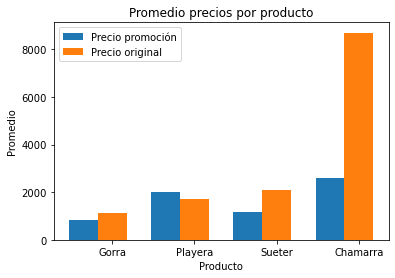

In [153]:
serie_1 = [prom_gorras1,prom_playera1,prom_sueter1,prom_chamarras1]
serie_2 = [prom_gorras2,prom_playera2,prom_sueter2,prom_chamarras2]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
 
plt.bar(indice_barras, serie_2, width=ancho_barras, label='Precio promoción')
plt.bar(indice_barras + ancho_barras, serie_1, width=ancho_barras, label='Precio original')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, ('Gorra', 'Playera', 'Sueter', 'Chamarra'))
 
plt.ylabel('Promedio')
plt.xlabel('Producto')
plt.title('Promedio precios por producto')
 
plt.show()

## SEARS

In [154]:
#Separamos por producto SEARS
df_gorras_sears=ps.sqldf("SELECT * FROM df_sears WHERE marca = 'gorra'")
df_playera_sears=ps.sqldf("SELECT * FROM df_sears WHERE marca = 'playera'")
df_sueter_sears=ps.sqldf("SELECT * FROM df_sears WHERE marca = 'sueter'")
df_chamarra_sears=ps.sqldf("SELECT * FROM df_sears WHERE marca = 'chamarra'")

In [155]:
#promedios por producto de precio2
prom_gorras = df_gorras_sears["precio2"].mean()
prom_playera = df_playera_sears["precio2"].mean()
prom_sueter = df_sueter_sears["precio2"].mean()
prom_chamarra = df_chamarra_sears["precio2"].mean()

### Precio promedio por artículo SEARS

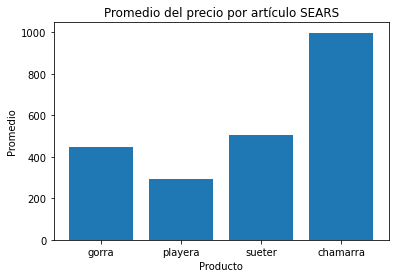

In [156]:
eje_x = ['gorra', 'playera', 'sueter', 'chamarra']
eje_y = [prom_gorras,prom_playera,prom_sueter,prom_chamarra]
plt.bar(eje_x, eje_y)
plt.ylabel('Promedio')
plt.xlabel('Producto')
plt.title('Promedio del precio por artículo SEARS')
plt.show()

## SHEIN

In [157]:
#Separamos por producto SHEIN
df_gorras_shein=ps.sqldf("SELECT * FROM df_shein WHERE Producto = 'gorra'")
df_playera_shein=ps.sqldf("SELECT * FROM df_shein WHERE Producto = 'playera'")
df_sueter_shein=ps.sqldf("SELECT * FROM df_shein WHERE Producto = 'sueter'")
df_chamarra_shein=ps.sqldf("SELECT * FROM df_shein WHERE Producto = 'chamarra'")

In [158]:
#promedios productos PALACIO DE HIERRO
#promedios por producto de Precio1
prom_gorras_shein1 = df_gorras_shein["Precio1"].mean()
prom_playera_shein1 = df_playera_shein["Precio1"].mean()
prom_sueter_shein1 = df_sueter_shein["Precio1"].mean()
prom_chamarras_shein1 = df_chamarra_shein["Precio1"].mean()

#promedios por producto de Precio2
prom_gorras_shein2 = df_gorras_shein["Precio2"].mean()
prom_playera_shein2 = df_playera_shein["Precio2"].mean()
prom_sueter_shein2 = df_sueter_shein["Precio2"].mean()
prom_chamarras_shein2 = df_chamarra_shein["Precio2"].mean()

### Precio promedio por artículo SHEIN

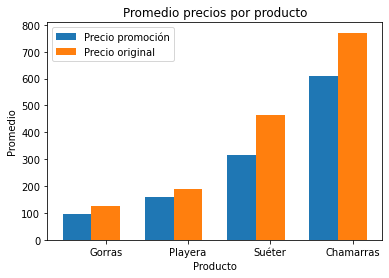

In [159]:


serie_3 = [prom_gorras_shein1,prom_playera_shein1,prom_sueter_shein1,prom_chamarras_shein1]
serie_4 = [prom_gorras_shein2,prom_playera_shein2,prom_sueter_shein2,prom_chamarras_shein2]
 
 
numero_de_grupos_shein = len(serie_1)
indice_barras_shein = np.arange(numero_de_grupos_shein)
ancho_barras_shein =0.35
 
plt.bar(indice_barras_shein, serie_4, width=ancho_barras_shein, label='Precio promoción')
plt.bar(indice_barras_shein + ancho_barras_shein, serie_3, width=ancho_barras_shein, label='Precio original')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras_shein + ancho_barras_shein, ('Gorras', 'Playera', 'Suéter', 'Chamarras'))
 
plt.ylabel('Promedio')
plt.xlabel('Producto')
plt.title('Promedio precios por producto')
 
plt.show()